In [1]:
from estnltk import Text

from pandas import read_csv
from estnltk.taggers import RegexTagger

from estnltk.spans import Span, SpanList
from estnltk.layer import Layer
from estnltk.finite_grammar.trees import print_nodes

In [2]:
with open("examples_.txt", "r") as fin:
    lines = fin.readlines()
lines = [line.strip() for line in lines]    

In [3]:
lines

['PSA 03042012 - 0,83ng/ml perearsti poolt .',
 'PSA 2010. 3ng/ml, PSA 2012. 1,53ng/ml . - Bx va',
 'PSA 20105,99 ja 26.01.2012 uuesti .',
 'PSA 2011 oli 0 , 4 nG7ml .',
 'PSA 201222,25ng/ml',
 'PSA 2 aastajooksuldünaamikata , eriuuring',
 ':psa 16,81! ! ! ! ! ,',
 'Happe-aluse tasakaal 6.0 ( 5.0 .. 8.0 )',
 'loli 25 mgx1 ja Monoprili 10 mg Kolesterool 2011a',
 'Kolesterool 1k aastas .',
 'Kõrgenenud kolesterool 2a ( mõõdetud ). Ei pea dieetist kinni',
 'Kontr Verekol 08.12a Per-le juurde .',
 's vas munajuha kasvaja op , günekol 3a tagssi .',
 '08.11.2010 PSA 13.12.2011 7,2ng/ml PSADT on väike .',
 'Rütmihäire tsüklipikkus 330 msek',
 'Loote pikkus : \xa0 3 mm - vastab\xa0 5 nädalat 6 päeva.',
 'Põhjendus: PALAT 10 # ALAT maksanäitaja',
 'ärme vähk 2007 aastast cT3N0M0PSA 59ng/ml .',
 'PSA 8,5( püsib aastaid selles väärtus',
 'S , P-PSA 4.130( <4.100 µg/L )',
 'PSA 5,2.',
 'Kolesterool oli 7,9 mmol/l 0',
 'kolesterool 6.4.',
 'Kolesterool 5,2 mmol/l - esialgu dieet .',
 'SK 3900 g , S

In [4]:
vocabulary = 'regexes.csv'

In [5]:
vocabulary = read_csv(vocabulary, na_filter=False, index_col=False)

In [6]:
test_regex_tagger = RegexTagger(vocabulary=vocabulary[:27],
                                attributes=['regex_type', 'value', 'grammar_symbol'],
                                conflict_resolving_strategy='MAX',
                                overlapped=False,
                                layer_name='type')

In [7]:
spaces = vocabulary[27:]

In [8]:
spaces

,_regex_pattern_,_group_,_priority_,regex_type,value,grammar_symbol
27,[-=.>< ]*,0,1,space,space,SPACE
28,\.?\s*-?\s*,0,1,space,space,SPACE
29,[-=.>< ]*(on|oli)\s*,0,1,space,space,SPACE
30,\s*-?:?\s*\<?,0,1,space,space,SPACE
31,\s*,0,1,space,space,SPACE


In [9]:
space_tagger = RegexTagger(layer_name='space',
                           vocabulary = spaces,
                           attributes = [],
                           conflict_resolving_strategy='MAX',
                           overlapped=True
                         )

In [10]:
from estnltk.taggers.gaps_tagging.gaps_tagger import GapsTagger
gaps_tagger = GapsTagger(layer_name='random_text_layer',
                         input_layers=['space', 'type'],
                         attributes=['no_idea', 'grammar_symbol'],
                         decorator=lambda t: {'no_idea':'text', 'grammar_symbol':'RANDOM_TEXT'})

In [11]:
from estnltk.taggers.merge_tagging.merge_tagger import MergeTagger
merge_tagger = MergeTagger(layer_name='grammar_tags',
                           input_layers=['type', 'random_text_layer'],
                           attributes=('grammar_symbol', 'value'))

In [12]:
lines

['PSA 03042012 - 0,83ng/ml perearsti poolt .',
 'PSA 2010. 3ng/ml, PSA 2012. 1,53ng/ml . - Bx va',
 'PSA 20105,99 ja 26.01.2012 uuesti .',
 'PSA 2011 oli 0 , 4 nG7ml .',
 'PSA 201222,25ng/ml',
 'PSA 2 aastajooksuldünaamikata , eriuuring',
 ':psa 16,81! ! ! ! ! ,',
 'Happe-aluse tasakaal 6.0 ( 5.0 .. 8.0 )',
 'loli 25 mgx1 ja Monoprili 10 mg Kolesterool 2011a',
 'Kolesterool 1k aastas .',
 'Kõrgenenud kolesterool 2a ( mõõdetud ). Ei pea dieetist kinni',
 'Kontr Verekol 08.12a Per-le juurde .',
 's vas munajuha kasvaja op , günekol 3a tagssi .',
 '08.11.2010 PSA 13.12.2011 7,2ng/ml PSADT on väike .',
 'Rütmihäire tsüklipikkus 330 msek',
 'Loote pikkus : \xa0 3 mm - vastab\xa0 5 nädalat 6 päeva.',
 'Põhjendus: PALAT 10 # ALAT maksanäitaja',
 'ärme vähk 2007 aastast cT3N0M0PSA 59ng/ml .',
 'PSA 8,5( püsib aastaid selles väärtus',
 'S , P-PSA 4.130( <4.100 µg/L )',
 'PSA 5,2.',
 'Kolesterool oli 7,9 mmol/l 0',
 'kolesterool 6.4.',
 'Kolesterool 5,2 mmol/l - esialgu dieet .',
 'SK 3900 g , S

In [13]:
j = Text(lines[0])

In [14]:
test_regex_tagger.tag(j)

In [15]:
j.type

layer name,attributes,parent,enveloping,ambiguous,span count
type,"regex_type, value, grammar_symbol",None,None,False,4
text,start,end,regex_type,value,grammar_symbol
PSA,0,3,measurement_object,psa,MO
03042012,4,12,date4,date,DATE
"0,83",15,19,number1,whatever,NUMBER
ng/ml,19,24,unit,psa_unit,UNIT


In [16]:
tagged_lines = []
lines_to_texts = {}
for line in lines:
    print(line)
    text = Text(line)
    test_regex_tagger.tag(text)
    space_tagger.tag(text)
    gaps_tagger.tag(text)
    merge_tagger.tag(text)
    tagged_lines.append(text)
    lines_to_texts[line] = text

PSA 03042012 - 0,83ng/ml perearsti poolt .
PSA 2010. 3ng/ml, PSA 2012. 1,53ng/ml . - Bx va
PSA 20105,99 ja 26.01.2012 uuesti .
PSA 2011 oli 0 , 4 nG7ml .
PSA 201222,25ng/ml
PSA 2 aastajooksuldünaamikata , eriuuring
:psa 16,81! ! ! ! ! ,
Happe-aluse tasakaal 6.0 ( 5.0 .. 8.0 )
loli 25 mgx1 ja Monoprili 10 mg Kolesterool 2011a
Kolesterool 1k aastas .
Kõrgenenud kolesterool 2a ( mõõdetud ). Ei pea dieetist kinni
Kontr Verekol 08.12a Per-le juurde .
s vas munajuha kasvaja op , günekol 3a tagssi .
08.11.2010 PSA 13.12.2011 7,2ng/ml PSADT on väike .
Rütmihäire tsüklipikkus 330 msek
Loote pikkus :   3 mm - vastab  5 nädalat 6 päeva.
Põhjendus: PALAT 10 # ALAT maksanäitaja
ärme vähk 2007 aastast cT3N0M0PSA 59ng/ml .
PSA 8,5( püsib aastaid selles väärtus
S , P-PSA 4.130( <4.100 µg/L )
PSA 5,2.
Kolesterool oli 7,9 mmol/l 0
kolesterool 6.4.
Kolesterool 5,2 mmol/l - esialgu dieet .
SK 3900 g , SP 51 cm .
Lapse kaal 5,4 kg/82 mg/0,82 ml i/m .
Kehakaal 80,2 kg , KMI 25,9
S , P-NT-proBNP 668 ( <125 p

In [17]:
for line in tagged_lines:
    print(line.text)
    #print(line.regex_type)
    #print(line.random_text_layer)
    print(line.grammar_tags)
    print('-----------------------------------------------------')

PSA 03042012 - 0,83ng/ml perearsti poolt .
SL[Span(PSA, {'value': 'psa', 'grammar_symbol': 'MO'}),
Span(03042012, {'value': 'date', 'grammar_symbol': 'DATE'}),
Span(0,83, {'value': 'whatever', 'grammar_symbol': 'NUMBER'}),
Span(ng/ml, {'value': 'psa_unit', 'grammar_symbol': 'UNIT'}),
Span(perearsti, {'value': None, 'grammar_symbol': 'RANDOM_TEXT'}),
Span(poolt, {'value': None, 'grammar_symbol': 'RANDOM_TEXT'})]
-----------------------------------------------------
PSA 2010. 3ng/ml, PSA 2012. 1,53ng/ml . - Bx va
SL[Span(PSA, {'value': 'psa', 'grammar_symbol': 'MO'}),
Span(2010, {'value': 'partial_date', 'grammar_symbol': 'DATE'}),
Span(3, {'value': None, 'grammar_symbol': 'RANDOM_TEXT'}),
Span(ng/ml, {'value': 'psa_unit', 'grammar_symbol': 'UNIT'}),
Span(,, {'value': None, 'grammar_symbol': 'RANDOM_TEXT'}),
Span( PSA, {'value': 'psa', 'grammar_symbol': 'MO'}),
Span(2012, {'value': 'partial_date', 'grammar_symbol': 'DATE'}),
Span(1,, {'value': None, 'grammar_symbol': 'RANDOM_TEXT'}),
Spa

# GRAMMAR

(MO = measurement_object)<br>
QNUMBER = NUMBER_UNIT<br>
QNUMBER = NUMBER<br>
MEASUREMENT = MO_DATE_QNUMBER<br>
MEASUREMENT = MO_QNUMBER<br>
TRASH = RUBBISH_NUMBER<br>
TRASH = RUBBISH_MO_NUMBER<br>
TRASH = RUBBISH<br>
TRASH = MO_DATE

In [18]:
from estnltk.finite_grammar.trees import Rule, Grammar


def qnumber_decorator(nodes):
    number, unit = nodes
    unit_type = unit.value
    return {'value': float(number.text.replace(',', '.').replace(' ', '')),
            'unit': unit.text,
            'unit_type': unit_type,
            'mtype': 'continuous'}

def measurement_decorator(nodes):
    return {'date': nodes[1].value}

def measurement_checker(nodes):
    #if len(nodes) == 2:
    mo, qnumber = nodes[0], nodes[1]
    #units = {'psa':'psa_unit',
    #         'kolesterool':'chol_unit',
    ##         'pulss':'pulss_unit',
    #         'pikkus':'pikkus_unit',
    #         'kaal':'kaal_unit',
    #         'alat':'alat_unit'
    #        }
    #elif len(nodes) == 3:
    #    mo, qnumber = nodes[0], nodes[2]
    #    units = {'psa':'xx_unit',
                 #'kolesterool':'chol_unit',
                 #'pulss':'pulss_unit',
                 #'pikkus':'pikkus_unit',
                 #'kaal':'kaal_unit',
                #'alat':'alat_unit'
                #}
    if hasattr(qnumber, 'unit_type'):
        return True
        #return units[mo.value] == qnumber.unit_type
    return False

rules = []
rules.append(Rule('QNUMBER', 'NUMBER UNIT', 0, qnumber_decorator))
rules.append(Rule('QNUMBER', 'NUMBER', 1))
rules.append(Rule('MEASUREMENT', 'MO DATE QNUMBER', 0, measurement_decorator, measurement_checker))
rules.append(Rule('MEASUREMENT', 'MO QNUMBER', consistency_checker=measurement_checker))
rules.append(Rule('TRASH', 'RUBBISH NUMBER'))
rules.append(Rule('TRASH', 'RUBBISH MO NUMBER'))
rules.append(Rule('TRASH', 'RUBBISH'))
rules.append(Rule('TRASH', 'MO DATE'))

grammar = Grammar(start_symbols=['MEASUREMENT', 'TRASH'], rules=rules, max_depth=4)
grammar


Grammar:
	start: MEASUREMENT, TRASH
	terminals: DATE, MO, NUMBER, RUBBISH, UNIT
	nonterminals: MEASUREMENT, QNUMBER, TRASH
	max_depth: 4
Rules:
	QNUMBER -> NUMBER UNIT	: 0, cc: default_validator, dec: qnumber_decorator
	QNUMBER -> NUMBER	: 1, cc: default_validator, dec: default_decorator
	MEASUREMENT -> MO DATE QNUMBER	: 0, cc: measurement_checker, dec: measurement_decorator
	MEASUREMENT -> MO QNUMBER	: 0, cc: measurement_checker, dec: default_decorator
	TRASH -> RUBBISH NUMBER	: 0, cc: default_validator, dec: default_decorator
	TRASH -> RUBBISH MO NUMBER	: 0, cc: default_validator, dec: default_decorator
	TRASH -> RUBBISH	: 0, cc: default_validator, dec: default_decorator
	TRASH -> MO DATE	: 0, cc: default_validator, dec: default_decorator

In [19]:
from estnltk.taggers import Tagger
from estnltk.finite_grammar.trees import LayerGraph, SpanNode, ParseNode, START_NODE, END_NODE, parse_graph, plot_graph

from estnltk.layer_operations.consecutive import iterate_consecutive_spans
from estnltk.layer_operations.consecutive import iterate_starting_spans
from estnltk.layer_operations.consecutive import iterate_ending_spans

def layer_to_graph(layer, attributes=None):
    if attributes is None:
        attributes = layer.attributes
    assert not attributes or set(attributes) <= set(layer.attributes)

    graph = LayerGraph()
    spans = layer.spans

    for b in iterate_starting_spans(spans):
        graph.add_edge(START_NODE, SpanNode(b, 'grammar_symbol'))
    for a in iterate_ending_spans(spans):
        graph.add_edge(SpanNode(a, 'grammar_symbol'), END_NODE)
    for a, b in iterate_consecutive_spans(spans):
        graph.add_edge(SpanNode(a, 'grammar_symbol'), SpanNode(b, 'grammar_symbol'))

    if not spans:
        graph.add_edge(START_NODE, END_NODE)

    return graph

def get_spans(node):
    result = []
    def _get_spans(node):
        support = node.support
        if isinstance(support, Span):
            result.append(support)
        else:
            for supp in support:
                _get_spans(supp)

    _get_spans(node)
    return(result)


class ParseTagger(Tagger):
    description = 'Parses input layer using grammar. Output layer envelopes input.'
    attributes = None
    configuration = {}
    depends_on = []
    layer_name = ''
    
    def __init__(self, grammar, input_layer, layer_name='parse', attributes=(), grammar_symbols={}):
        self.layer_name = layer_name
        self.input_layer = input_layer
        self.attributes = attributes
        self.depends_on = [input_layer]
        self.grammar_symbols = set(grammar_symbols)

    def make_layer(self, text, layers):
        graph = layer_to_graph(layers[self.input_layer])
        graph = parse_graph(graph, grammar)
        
        attributes = self.attributes
        layer = Layer(name=self.layer_name,
                      enveloping=self.input_layer,
                      attributes=attributes
                     )
        for node in graph:
            if isinstance(node, (SpanNode, ParseNode)) and node.name in self.grammar_symbols:
                span = SpanList()
                span.spans = get_spans(node)
                for attr in attributes:
                    setattr(span, attr, getattr(node, attr, None))
                layer.add_span(span)
        return layer

    def tag(self, text, return_layer=False):
        layer = self.make_layer(text.text, text.layers)
        assert isinstance(layer, Layer), 'make_layer must return a Layer instance'
        if return_layer:
            return layer
        text[self.layer_name] = layer

parse_tagger = ParseTagger(layer_name='parse',
                           attributes=['name', 'value','unit_type', 'regex_type'],
                           input_layer='grammar_tags',
                           grammar=grammar,
                           grammar_symbols={'DATE','UNIT','QNUMBER', 'MEASUREMENT', 'MO', 'NUMBER'})

In [20]:
parse_tagger.grammar_symbols

{'DATE', 'MEASUREMENT', 'MO', 'NUMBER', 'QNUMBER', 'UNIT'}

In [21]:
parse_tagger

name,layer,attributes,depends_on
ParseTagger,parse,"[name, value, unit_type, regex_type]",[grammar_tags]


In [22]:
from estnltk.finite_grammar import phrase_list_generator

for phrase in phrase_list_generator(grammar, max_depth=5):
    print(phrase)

['MO', 'DATE', 'NUMBER', 'UNIT', 'RUBBISH', 'NUMBER']
['MO', 'DATE', 'NUMBER', 'UNIT', 'RUBBISH', 'MO', 'NUMBER']
['MO', 'DATE', 'NUMBER', 'UNIT', 'RUBBISH']
['MO', 'DATE', 'NUMBER', 'UNIT', 'MO', 'DATE']
['MO', 'DATE', 'NUMBER', 'RUBBISH', 'NUMBER']
['MO', 'DATE', 'NUMBER', 'RUBBISH', 'MO', 'NUMBER']
['MO', 'DATE', 'NUMBER', 'RUBBISH']
['MO', 'DATE', 'NUMBER', 'MO', 'DATE']
['MO', 'NUMBER', 'UNIT', 'RUBBISH', 'NUMBER']
['MO', 'NUMBER', 'UNIT', 'RUBBISH', 'MO', 'NUMBER']
['MO', 'NUMBER', 'UNIT', 'RUBBISH']
['MO', 'NUMBER', 'UNIT', 'MO', 'DATE']
['MO', 'NUMBER', 'RUBBISH', 'NUMBER']
['MO', 'NUMBER', 'RUBBISH', 'MO', 'NUMBER']
['MO', 'NUMBER', 'RUBBISH']
['MO', 'NUMBER', 'MO', 'DATE']


rjeldus : Siinusbradükardia Fr 587min


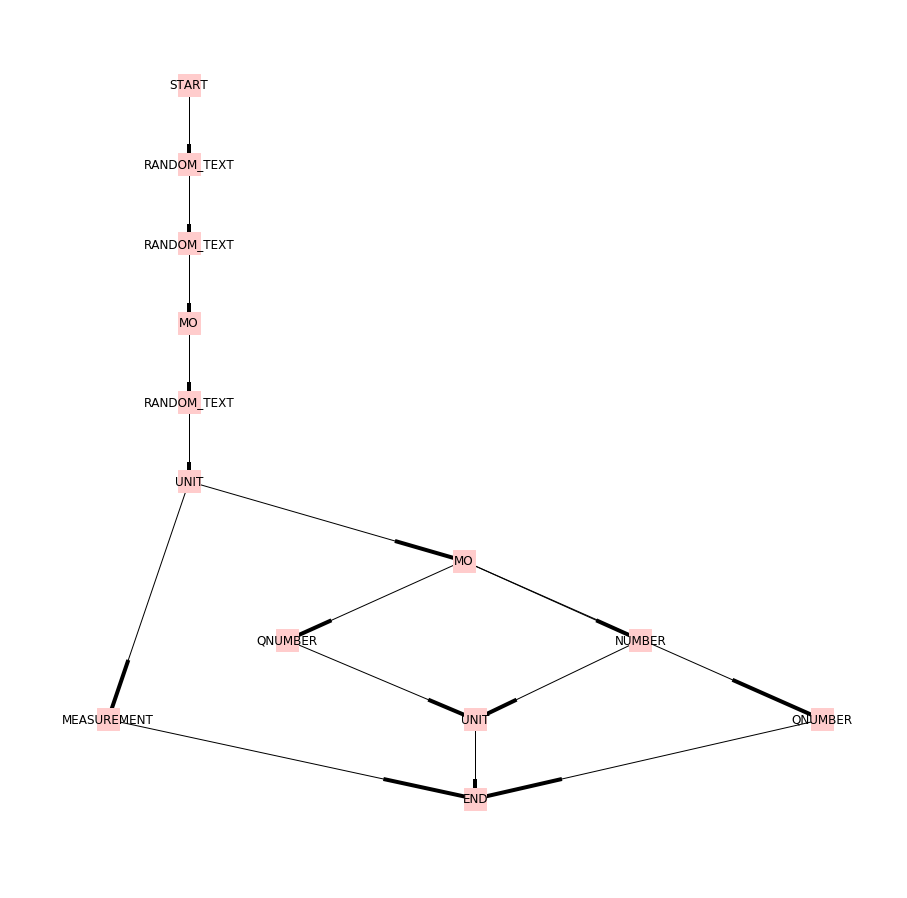

In [23]:
print(text.text)
graph = layer_to_graph(text['grammar_tags'])
graph = parse_graph(graph, grammar, 4)
plot_graph(graph)

In [24]:
t = 'PSA 03042012 - 0,83ng/ml perearsti poolt .'

In [25]:
t2 = 'PSA 2010. 3ng/ml, PSA 2012. 1,53ng/ml . - Bx va'

In [26]:
t3 = 'Kehakaal 80,2 kg , KMI 25,9'

In [27]:
text = Text(t)
test_regex_tagger.tag(text)
space_tagger.tag(text)
gaps_tagger.tag(text)
merge_tagger.tag(text)
print(text.text)
graph = layer_to_graph(text['grammar_tags'])
graph = parse_graph(graph, grammar, 4)
print_nodes(graph, text, 
        names={'DATE','UNIT','QNUMBER', 'MEASUREMENT', 'MO', 'NUMBER'},
        attributes=['name', 'text', 'value','unit_type', 'regex_type'])

PSA 03042012 - 0,83ng/ml perearsti poolt .
name                text                value               unit_type           regex_type          

DATE                03042012            date                                                        
MO                  PSA                 psa                                                         
NUMBER              0,83                whatever                                                    
QNUMBER             0,83                                                                            
QNUMBER             0,83ng/ml           0.83                psa_unit                                
UNIT                ng/ml               psa_unit                                                    


In [28]:
parse_tagger.tag(text)
text.parse

SL[SL[Span(PSA, {'value': 'psa', 'grammar_symbol': 'MO'})],
SL[Span(03042012, {'value': 'date', 'grammar_symbol': 'DATE'})],
SL[Span(0,83, {'value': 'whatever', 'grammar_symbol': 'NUMBER'})],
SL[Span(0,83, {'value': 'whatever', 'grammar_symbol': 'NUMBER'})],
SL[Span(0,83, {'value': 'whatever', 'grammar_symbol': 'NUMBER'}),
Span(ng/ml, {'value': 'psa_unit', 'grammar_symbol': 'UNIT'})],
SL[Span(ng/ml, {'value': 'psa_unit', 'grammar_symbol': 'UNIT'})]]

In [29]:
text = Text(t2)
test_regex_tagger.tag(text)
space_tagger.tag(text)
gaps_tagger.tag(text)
merge_tagger.tag(text)
print(text.text)
graph = layer_to_graph(text['grammar_tags'])
graph = parse_graph(graph, grammar, 4)
print_nodes(graph, text, 
        names={'DATE','UNIT','QNUMBER', 'MEASUREMENT', 'MO', 'NUMBER'},
        attributes=['name', 'text', 'value','unit_type', 'regex_type'])

PSA 2010. 3ng/ml, PSA 2012. 1,53ng/ml . - Bx va
name                text                value               unit_type           regex_type          

DATE                2010                partial_date                                                
DATE                2012                partial_date                                                
MO                   PSA                psa                                                         
MO                  PSA                 psa                                                         
NUMBER              53                  whatever                                                    
QNUMBER             53                                                                              
QNUMBER             53ng/ml             53.0                psa_unit                                
UNIT                ng/ml               psa_unit                                                    
UNIT                ng/ml               ps

In [30]:
parse_tagger.tag(text)
text.parse

SL[SL[Span(PSA, {'value': 'psa', 'grammar_symbol': 'MO'})],
SL[Span(2010, {'value': 'partial_date', 'grammar_symbol': 'DATE'})],
SL[Span(ng/ml, {'value': 'psa_unit', 'grammar_symbol': 'UNIT'})],
SL[Span( PSA, {'value': 'psa', 'grammar_symbol': 'MO'})],
SL[Span(2012, {'value': 'partial_date', 'grammar_symbol': 'DATE'})],
SL[Span(53, {'value': 'whatever', 'grammar_symbol': 'NUMBER'})],
SL[Span(53, {'value': 'whatever', 'grammar_symbol': 'NUMBER'})],
SL[Span(53, {'value': 'whatever', 'grammar_symbol': 'NUMBER'}),
Span(ng/ml, {'value': 'psa_unit', 'grammar_symbol': 'UNIT'})],
SL[Span(ng/ml, {'value': 'psa_unit', 'grammar_symbol': 'UNIT'})],
SL[Span(x, {'value': 'time_unit', 'grammar_symbol': 'UNIT'})]]

In [31]:
text = Text(t3)
test_regex_tagger.tag(text)
space_tagger.tag(text)
gaps_tagger.tag(text)
merge_tagger.tag(text)
print(text.text)
graph = layer_to_graph(text['grammar_tags'])
graph = parse_graph(graph, grammar, 4)
print_nodes(graph, text, 
        names={'DATE','UNIT','QNUMBER', 'MEASUREMENT', 'MO', 'NUMBER'},
        attributes=['name', 'text', 'value','unit_type', 'regex_type'])

Kehakaal 80,2 kg , KMI 25,9
name                text                value               unit_type           regex_type          

MEASUREMENT         Kehakaal 80,2 kg                                                                
MO                  Kehakaal            kaal                                                        
NUMBER              25,9                whatever                                                    
NUMBER              80,2                whatever                                                    
QNUMBER             25,9                                                                            
QNUMBER             80,2                                                                            
QNUMBER             80,2 kg             80.2                kaal_unit                               
UNIT                kg                  kaal_unit                                                   


In [32]:
parse_tagger.tag(text)
text.parse

SL[SL[Span(Kehakaal, {'value': 'kaal', 'grammar_symbol': 'MO'})],
SL[Span(Kehakaal, {'value': 'kaal', 'grammar_symbol': 'MO'}),
Span(80,2, {'value': 'whatever', 'grammar_symbol': 'NUMBER'}),
Span(kg, {'value': 'kaal_unit', 'grammar_symbol': 'UNIT'})],
SL[Span(80,2, {'value': 'whatever', 'grammar_symbol': 'NUMBER'})],
SL[Span(80,2, {'value': 'whatever', 'grammar_symbol': 'NUMBER'})],
SL[Span(80,2, {'value': 'whatever', 'grammar_symbol': 'NUMBER'}),
Span(kg, {'value': 'kaal_unit', 'grammar_symbol': 'UNIT'})],
SL[Span(kg, {'value': 'kaal_unit', 'grammar_symbol': 'UNIT'})],
SL[Span(25,9, {'value': 'whatever', 'grammar_symbol': 'NUMBER'})],
SL[Span(25,9, {'value': 'whatever', 'grammar_symbol': 'NUMBER'})]]

In [33]:
for line in tagged_lines:
    text = line
    print(text.text)
    graph = layer_to_graph(text['grammar_tags'])
    graph = parse_graph(graph, grammar, 4)
    print_nodes(graph, text, 
            names={'DATE','UNIT','QNUMBER', 'MEASUREMENT', 'MO', 'NUMBER'},
            attributes=['name', 'text', 'value','type', 'start', 'unit_type'])
    print('------------------------')

PSA 03042012 - 0,83ng/ml perearsti poolt .
name                text                value               type                start               unit_type           

DATE                03042012            date                                    4                                       
MO                  PSA                 psa                                     0                                       
NUMBER              0,83                whatever                                15                                      
QNUMBER             0,83                                                        15                                      
QNUMBER             0,83ng/ml           0.83                                    15                  psa_unit            
UNIT                ng/ml               psa_unit                                19                                      
------------------------
PSA 2010. 3ng/ml, PSA 2012. 1,53ng/ml . - Bx va
name                text            

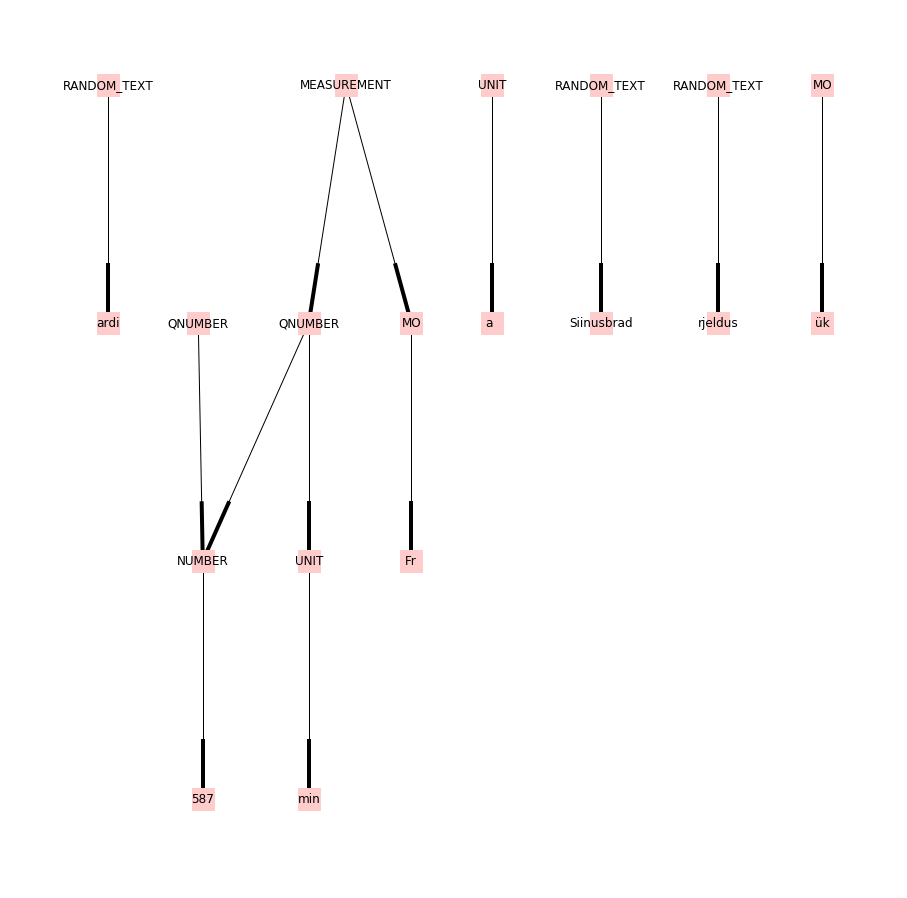

In [34]:
import networkx as nx
from estnltk.finite_grammar.trees import Node

def graph_to_parse_trees(graph):
    parse_trees = nx.DiGraph()
    for node in graph.nodes():
        if isinstance(node, ParseNode):
            for supp in node.support:
                parse_trees.add_edge(node, supp)
        elif isinstance(node, SpanNode):
            parse_trees.add_edge(node, Node(node.text))
    return parse_trees

parse_trees = graph_to_parse_trees(graph)
plot_graph(parse_trees)

In [35]:
import ipywidgets as widgets


text_selection = widgets.Dropdown(
    options=lines,
    description='Text:',
)

def observe(change):
    out.clear_output()
    with out:
        line = change['new']
        graph = layer_to_graph(text['grammar_tags'])
        graph = parse_graph(graph, grammar, 4)
        print(lines_to_texts[line].text)
        plot_graph(graph)

text_selection.observe(observe, names='value')

out = widgets.Output()

display(text_selection, out)

Dropdown(description='Text:', options=('PSA 03042012 - 0,83ng/ml perearsti poolt .', 'PSA 2010. 3ng/ml, PSA 2012. 1,53ng/ml . - Bx va', 'PSA 20105,99 ja 26.01.2012 uuesti .', 'PSA 2011 oli 0 , 4 nG7ml .', 'PSA 201222,25ng/ml', 'PSA 2 aastajooksuldünaamikata , eriuuring', ':psa 16,81! ! ! ! ! ,', 'Happe-aluse tasakaal 6.0 ( 5.0 .. 8.0 )', 'loli 25 mgx1 ja Monoprili 10 mg Kolesterool 2011a', 'Kolesterool 1k aastas .', 'Kõrgenenud kolesterool 2a ( mõõdetud ). Ei pea dieetist kinni', 'Kontr Verekol 08.12a Per-le juurde .', 's vas munajuha kasvaja op , günekol 3a tagssi .', '08.11.2010 PSA 13.12.2011 7,2ng/ml PSADT on väike .', 'Rütmihäire tsüklipikkus 330 msek', 'Loote pikkus : \xa0 3 mm - vastab\xa0 5 nädalat 6 päeva.', 'Põhjendus: PALAT 10 # ALAT maksanäitaja', 'ärme vähk 2007 aastast cT3N0M0PSA 59ng/ml .', 'PSA 8,5( püsib aastaid selles väärtus', 'S , P-PSA 4.130( <4.100 µg/L )', 'PSA 5,2.', 'Kolesterool oli 7,9 mmol/l 0', 'kolesterool 6.4.', 'Kolesterool 5,2 mmol/l - esialgu dieet .', 'SK 3900 g , SP 51 cm .', 'Lapse kaal 5,4 kg/82 mg/0,82 ml i/m .', 'Kehakaal 80,2 kg , KMI 25,9', 'S , P-NT-proBNP 668 ( <125 pg/mL ) S , P-Albumiin 43 ( 35 .. 52 g/L ) S , P-ALAT 25 ( <33 U/L )', 'PSA 6,5 ng/ml, eesnäärme maht67cm3', 'rjeldus : Siinusbradükardia Fr 587min'), value='PSA 03042012 - 0,83ng/ml perearsti poolt .')

Output()

In [36]:
for node in graph:
    node.print()

SpanNode
  name                 UNIT
  grammar_symbol       UNIT
  text                 a 
  start                26
  end                  28
  support              Span(a , {'value': 'time_unit', 'grammar_symbol': 'UNIT'})
  weight               1
  text_spans           ((26, 28),)
  value                time_unit
ParseNode
  name                 MEASUREMENT
  start                28
  end                  37
  support              (SpanNode(MO, (28, 30), 6636899088429461201), ParseNode(QNUMBER, (31, 37), -2920782048189573251))
  weight               1
  text_spans           ((28, 30), (31, 34), (34, 37))
SpanNode
  name                 MO
  grammar_symbol       MO
  text                 Fr
  start                28
  end                  30
  support              Span(Fr, {'value': 'pulss', 'grammar_symbol': 'MO'})
  weight               1
  text_spans           ((28, 30),)
  value                pulss
SpanNode
  name                 RANDOM_TEXT
  grammar_symbol       RANDOM_TEXT
  

In [37]:
nodes = sorted(graph.nodes)
nodes

[SpanNode(RANDOM_TEXT, (0, 7), 8534810691720098445),
 SpanNode(RANDOM_TEXT, (10, 20), -8881630998845485578),
 SpanNode(MO, (20, 22), -887385695928019650),
 SpanNode(RANDOM_TEXT, (22, 26), 848860424944757832),
 SpanNode(UNIT, (26, 28), 3521666433215999843),
 SpanNode(MO, (28, 30), 6636899088429461201),
 ParseNode(MEASUREMENT, (28, 37), 4195558435826084182),
 Node(START, -2899072906008712398),
 Node(END, -6264926877703253551),
 ParseNode(QNUMBER, (31, 34), -6543991828550961899),
 SpanNode(NUMBER, (31, 34), -137640640394305153),
 ParseNode(QNUMBER, (31, 37), -2920782048189573251),
 SpanNode(UNIT, (34, 37), -2749535879022765292)]

In [38]:
nodes[3].print()

SpanNode
  name                 RANDOM_TEXT
  grammar_symbol       RANDOM_TEXT
  text                 ardi
  start                22
  end                  26
  support              Span(ardi, {'value': None, 'grammar_symbol': 'RANDOM_TEXT'})
  weight               1
  text_spans           ((22, 26),)
  value                None


In [39]:
from estnltk.finite_grammar.trees import get_nodes
get_nodes(graph, 'QNUMBER')

[ParseNode(QNUMBER, (31, 34), -6543991828550961899),
 ParseNode(QNUMBER, (31, 37), -2920782048189573251)]

In [40]:
from estnltk.finite_grammar.trees import get_paths

list(get_paths(graph, nodes[3], nodes[0], nodes[11]))

[[SpanNode(RANDOM_TEXT, (0, 7), 8534810691720098445),
  SpanNode(RANDOM_TEXT, (10, 20), -8881630998845485578),
  SpanNode(MO, (20, 22), -887385695928019650),
  SpanNode(RANDOM_TEXT, (22, 26), 848860424944757832),
  SpanNode(UNIT, (26, 28), 3521666433215999843),
  SpanNode(MO, (28, 30), 6636899088429461201),
  ParseNode(QNUMBER, (31, 37), -2920782048189573251)]]

In [41]:
list(get_paths(graph, nodes[3]))

[[Node(START, -2899072906008712398),
  SpanNode(RANDOM_TEXT, (0, 7), 8534810691720098445),
  SpanNode(RANDOM_TEXT, (10, 20), -8881630998845485578),
  SpanNode(MO, (20, 22), -887385695928019650),
  SpanNode(RANDOM_TEXT, (22, 26), 848860424944757832),
  SpanNode(UNIT, (26, 28), 3521666433215999843),
  SpanNode(MO, (28, 30), 6636899088429461201),
  ParseNode(QNUMBER, (31, 34), -6543991828550961899),
  SpanNode(UNIT, (34, 37), -2749535879022765292),
  Node(END, -6264926877703253551)],
 [Node(START, -2899072906008712398),
  SpanNode(RANDOM_TEXT, (0, 7), 8534810691720098445),
  SpanNode(RANDOM_TEXT, (10, 20), -8881630998845485578),
  SpanNode(MO, (20, 22), -887385695928019650),
  SpanNode(RANDOM_TEXT, (22, 26), 848860424944757832),
  SpanNode(UNIT, (26, 28), 3521666433215999843),
  SpanNode(MO, (28, 30), 6636899088429461201),
  ParseNode(QNUMBER, (31, 37), -2920782048189573251),
  Node(END, -6264926877703253551)],
 [Node(START, -2899072906008712398),
  SpanNode(RANDOM_TEXT, (0, 7), 853481069